In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Preprocessing

In [3]:
def preprocess_data(df):
    to_log = ['areaWorst', 'compactnessWorst', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'concavityWorst']
    df_log = df.copy()
    for c in [c for c in df_log.columns if 'stderr' in c.lower() or c in to_log]:
        # use log const for values with 0 values bc log(0) is -inf
        log_const = 0.001
        df_log[c] = np.log10(df_log[c] + log_const)
    return df_log


In [4]:
data_path = r'data/Breast_Cancer/breast-cancer-diagnostic.shuf.lrn.csv'
df = pd.read_csv(data_path)

In [207]:
df.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


In [113]:
feat_cols = df.columns.difference(['ID', 'class'])

In [114]:
na_counts = df.isna().sum() / len(df)
print(f'Columns with missing values: {na_counts[na_counts > 0.0]}')

Columns with missing values: Series([], dtype: float64)


<ipython-input-115-e65ff3282681>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[feat_cols].hist(ax=axes)


array([[<AxesSubplot:title={'center':'areaMean'}>,
        <AxesSubplot:title={'center':'areaStdErr'}>,
        <AxesSubplot:title={'center':'areaWorst'}>,
        <AxesSubplot:title={'center':'compactnessMean'}>,
        <AxesSubplot:title={'center':'compactnessStdErr'}>],
       [<AxesSubplot:title={'center':'compactnessWorst'}>,
        <AxesSubplot:title={'center':'concavePointsMean'}>,
        <AxesSubplot:title={'center':'concavePointsStdErr'}>,
        <AxesSubplot:title={'center':'concavePointsWorst'}>,
        <AxesSubplot:title={'center':'concavityMean'}>],
       [<AxesSubplot:title={'center':'concavityStdErr'}>,
        <AxesSubplot:title={'center':'concavityWorst'}>,
        <AxesSubplot:title={'center':'fractalDimensionMean'}>,
        <AxesSubplot:title={'center':'fractalDimensionStdErr'}>,
        <AxesSubplot:title={'center':'fractalDimensionWorst'}>],
       [<AxesSubplot:title={'center':'perimeterMean'}>,
        <AxesSubplot:title={'center':'perimeterStdErr'}>,
    

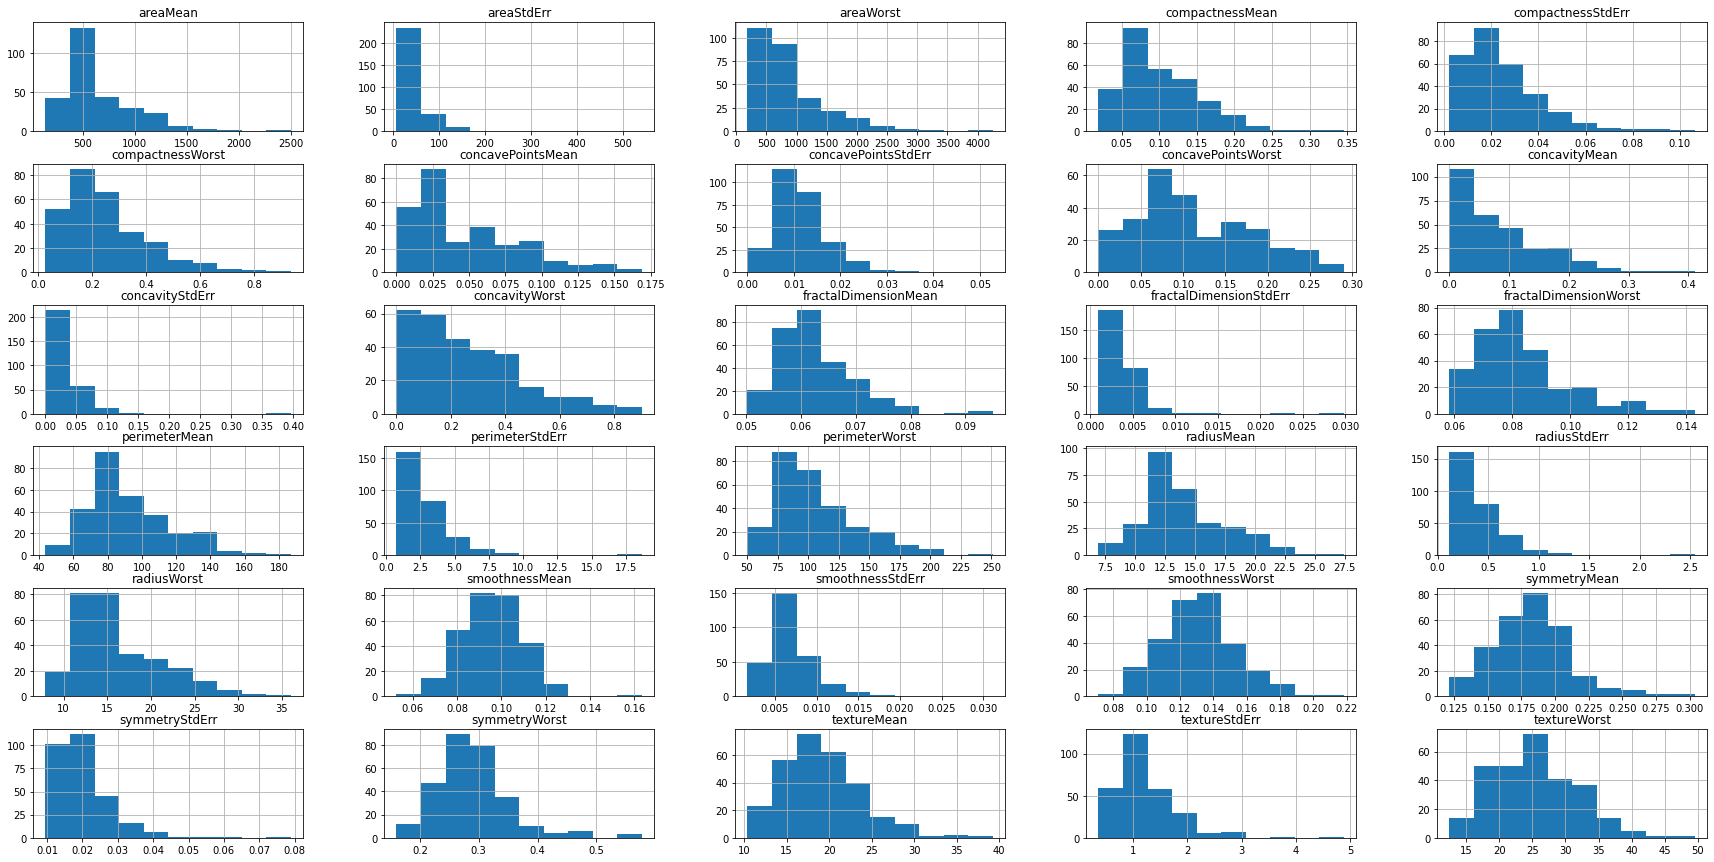

In [115]:
_, axes = plt.subplots(figsize=(30, 15))
df[feat_cols].hist(ax=axes)

In [116]:
df_log = preprocess_data(df)

<ipython-input-117-c710fbe94407>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_log[feat_cols].hist(ax=axes)


array([[<AxesSubplot:title={'center':'areaMean'}>,
        <AxesSubplot:title={'center':'areaStdErr'}>,
        <AxesSubplot:title={'center':'areaWorst'}>,
        <AxesSubplot:title={'center':'compactnessMean'}>,
        <AxesSubplot:title={'center':'compactnessStdErr'}>],
       [<AxesSubplot:title={'center':'compactnessWorst'}>,
        <AxesSubplot:title={'center':'concavePointsMean'}>,
        <AxesSubplot:title={'center':'concavePointsStdErr'}>,
        <AxesSubplot:title={'center':'concavePointsWorst'}>,
        <AxesSubplot:title={'center':'concavityMean'}>],
       [<AxesSubplot:title={'center':'concavityStdErr'}>,
        <AxesSubplot:title={'center':'concavityWorst'}>,
        <AxesSubplot:title={'center':'fractalDimensionMean'}>,
        <AxesSubplot:title={'center':'fractalDimensionStdErr'}>,
        <AxesSubplot:title={'center':'fractalDimensionWorst'}>],
       [<AxesSubplot:title={'center':'perimeterMean'}>,
        <AxesSubplot:title={'center':'perimeterStdErr'}>,
    

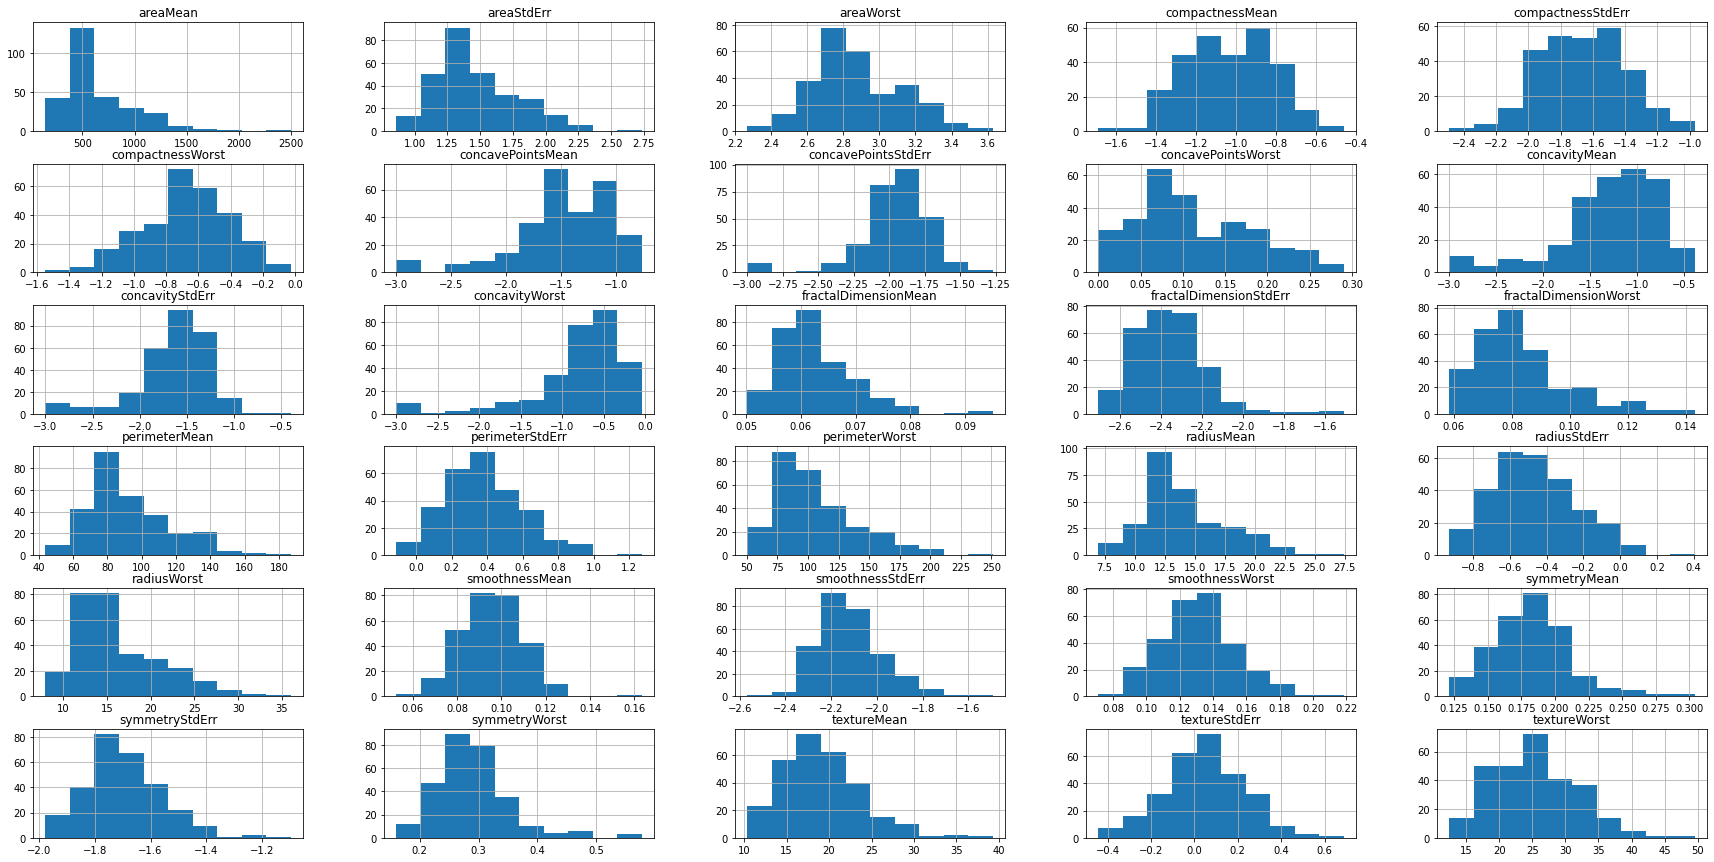

In [117]:
_, axes = plt.subplots(figsize=(30, 15))
df_log[feat_cols].hist(ax=axes)

<AxesSubplot:>

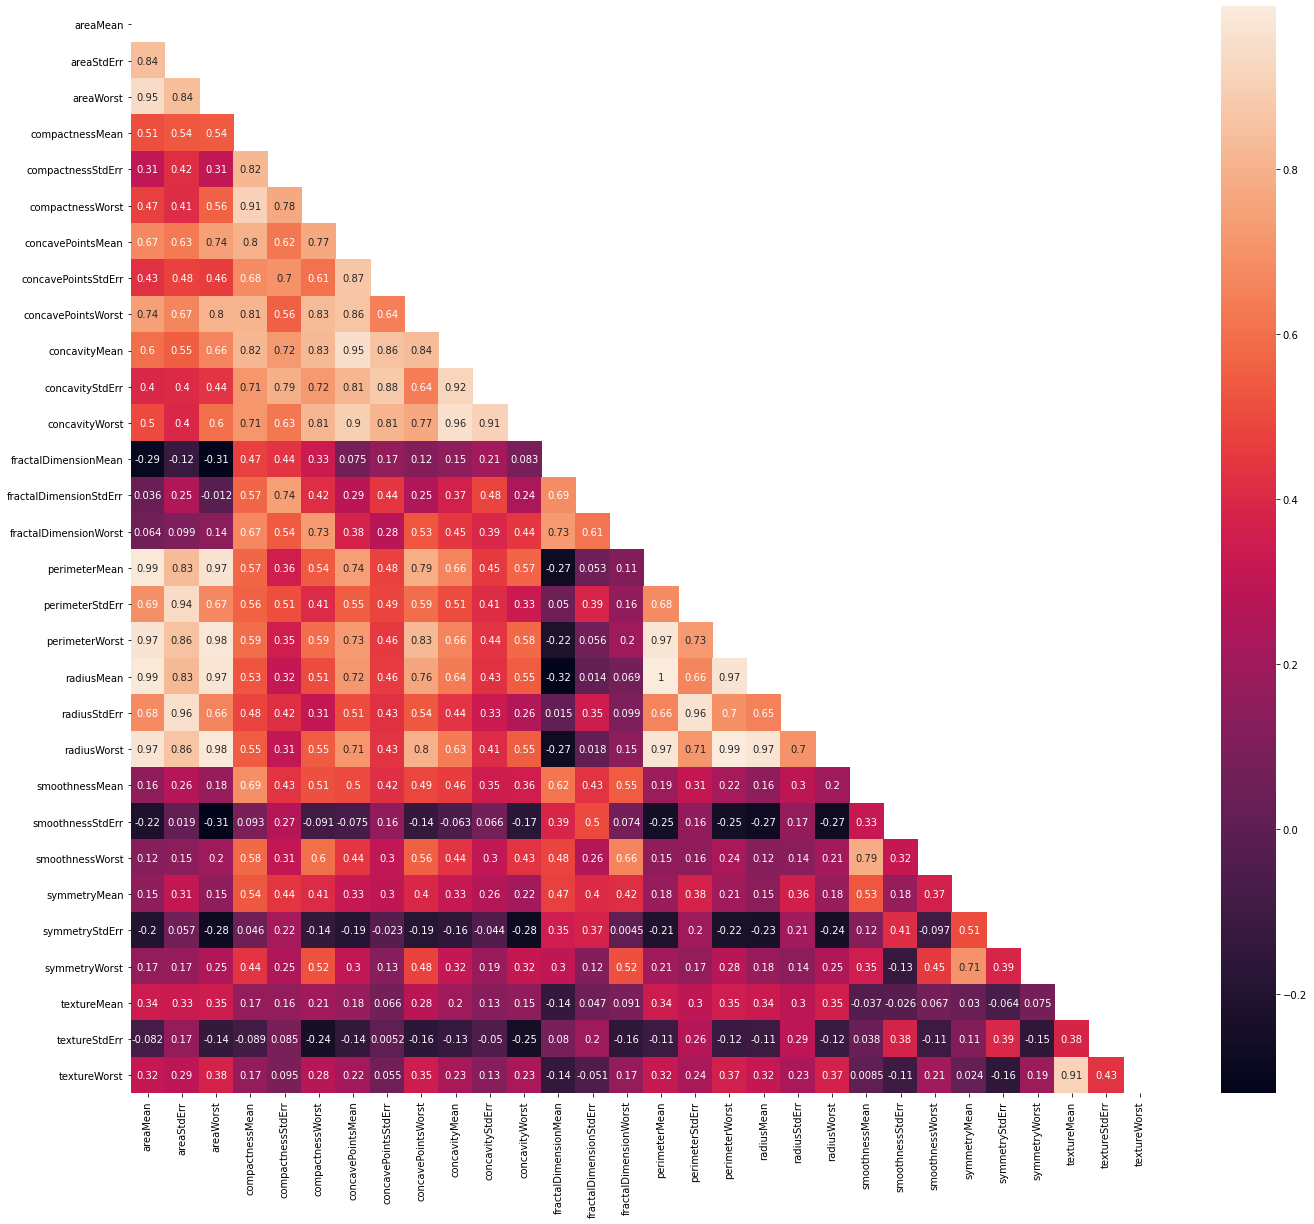

In [118]:
_, axes = plt.subplots(figsize=(23, 20))
df_corr = df_log[feat_cols].corr()
mask = np.triu(df_corr)
sns.heatmap(df_corr, mask=mask, annot=True)

In [119]:
df.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2.861498e+07,14.068674,19.116211,91.555053,649.617895,0.095851,0.102605,0.085587,0.047930,0.182908,...,16.214354,25.568737,106.866175,878.226316,0.131940,0.251042,0.263251,0.113729,0.291636,0.083341
std,1.204247e+08,3.486377,4.516754,24.028687,343.979266,0.013894,0.051422,0.075717,0.037409,0.028606,...,4.820742,6.318778,33.390308,572.257246,0.022377,0.153795,0.199783,0.067461,0.062957,0.016335
min,8.670000e+03,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.121500,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.160300,0.058430
25%,8.711490e+05,11.690000,15.900000,74.680000,418.700000,0.086000,0.062190,0.026880,0.020690,0.162100,...,13.010000,20.720000,84.160000,515.300000,0.116600,0.141500,0.111700,0.064130,0.250600,0.071910
50%,9.065390e+05,13.280000,18.700000,86.100000,546.400000,0.095140,0.092280,0.061950,0.033260,0.181400,...,14.970000,25.410000,97.820000,684.500000,0.131200,0.215800,0.217700,0.099750,0.284100,0.079570
75%,8.811523e+06,16.070000,21.840000,105.800000,797.800000,0.105100,0.130400,0.122600,0.073400,0.197600,...,19.070000,30.280000,126.300000,1124.000000,0.144000,0.323500,0.382900,0.162800,0.319800,0.090750
max,9.113205e+08,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.410800,0.168900,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.901900,0.290300,0.577400,0.143100


# Classification

In [5]:
from utils import classification_util as cu
from utils import data_preprocessing_util as dpu
from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, tree, neural_network, metrics, impute
from sklearn.pipeline import Pipeline
from copy import deepcopy

In [6]:
random_seed = 1038

In [7]:
y = df['class']
X = df[df.columns.difference(['ID', 'class'])]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = random_seed, shuffle=True, stratify=y)

X_tr, X_val, y_tr, y_val = model_selection.train_test_split(X_train, y_train, test_size = 0.2, random_state = random_seed, shuffle=True, stratify=y_train)

In [8]:
do_scaling = False

In [9]:
models = {}

### 1.1 Normal features

In [13]:
methods = [
    ('KNN', neighbors.KNeighborsClassifier()), 
    ('DT', tree.DecisionTreeClassifier()), 
    ('MLP', neural_network.MLPClassifier())
    ]
scaler = None
pipelines = cu.define_pipelines(methods, scaler=scaler)

#### KNN

In [14]:
knn_params = {'KNN__n_neighbors' : [5, 10, 25, 50], 
              'KNN__weights' : ['uniform', 'distance'],
              'KNN__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'KNN__p' : [1, 2]
             }
models['KNN'] = cu.perform_gridsearch(X_train, y_train, X_test, y_test, pipelines['KNN'], knn_params)

{'KNN__algorithm': 'auto',
 'KNN__n_neighbors': 10,
 'KNN__p': 1,
 'KNN__weights': 'uniform'}

0.9228658066830008

array([[0.97142857, 0.02857143],
       [0.27272727, 0.72727273]])

acc: 0.8771929824561403
balanced_acc: 0.8493506493506493
prfs: (array([0.85      , 0.94117647]), array([0.97142857, 0.72727273]), array([0.90666667, 0.82051282]), array([35, 22]))



#### DecisionTree

In [15]:
dt_params = {'DT__criterion': ['gini', 'entropy', 'log_loss'],
             'DT__splitter': ['best', 'random'],
             'DT__class_weight': [None, 'balanced'],
             'DT__random_state': [random_seed],
             }
models['DT'] = cu.perform_gridsearch(X_train, y_train, X_test, y_test, pipelines['DT'], dt_params)

{'DT__class_weight': 'balanced',
 'DT__criterion': 'entropy',
 'DT__random_state': 1038,
 'DT__splitter': 'best'}

0.937682626024832

array([[0.97142857, 0.02857143],
       [0.22727273, 0.77272727]])

acc: 0.8947368421052632
balanced_acc: 0.872077922077922
prfs: (array([0.87179487, 0.94444444]), array([0.97142857, 0.77272727]), array([0.91891892, 0.85      ]), array([35, 22]))



#### MLP

In [16]:
mlp_params = {'MLP__hidden_layer_sizes': [(10,), (10, 10), (20), (20, 20,)], 
              'MLP__activation': ['identity', 'logistic', 'tanh', 'relu'],
              'MLP__solver': ['lbfgs', 'adam', 'sgd'],
              'MLP__alpha': [0.001, 0.0001],
              'MLP__learning_rate': ['constant', 'invscaling', 'adaptive'],
              'MLP__max_iter': [1000],
              'MLP__random_state': [random_seed],
             }
models['MLP'] = cu.perform_gridsearch(X_train, y_train, X_test, y_test, pipelines['MLP'], mlp_params)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the n

{'MLP__activation': 'identity',
 'MLP__alpha': 0.0001,
 'MLP__hidden_layer_sizes': (20, 20),
 'MLP__learning_rate': 'constant',
 'MLP__max_iter': 1000,
 'MLP__random_state': 1038,
 'MLP__solver': 'lbfgs'}

0.942876856298547

array([[1.        , 0.        ],
       [0.18181818, 0.81818182]])

acc: 0.9298245614035088
balanced_acc: 0.9090909090909092
prfs: (array([0.8974359, 1.       ]), array([1.        , 0.81818182]), array([0.94594595, 0.9       ]), array([35, 22]))



### 1.2 Log-transformed features

In [17]:
df = preprocess_data(df)

y = df['class']
X = df[df.columns.difference(['ID', 'class'])]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = random_seed, shuffle=True, stratify=y)

X_tr, X_val, y_tr, y_val = model_selection.train_test_split(X_train, y_train, test_size = 0.2, random_state = random_seed, shuffle=True, stratify=y_train)

In [18]:
knn_params = {'KNN__n_neighbors' : [5, 10, 25, 50], 
              'KNN__weights' : ['uniform', 'distance'],
              'KNN__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'KNN__p' : [1, 2]
             }
models['log_KNN'] = cu.perform_gridsearch(X_train, y_train, X_test, y_test, pipelines['KNN'], knn_params)

{'KNN__algorithm': 'auto',
 'KNN__n_neighbors': 5,
 'KNN__p': 1,
 'KNN__weights': 'distance'}

0.9039643074227254

array([[0.94285714, 0.05714286],
       [0.22727273, 0.77272727]])

acc: 0.8771929824561403
balanced_acc: 0.8577922077922078
prfs: (array([0.86842105, 0.89473684]), array([0.94285714, 0.77272727]), array([0.90410959, 0.82926829]), array([35, 22]))



In [19]:
dt_params = {'DT__criterion': ['gini', 'entropy', 'log_loss'],
             'DT__splitter': ['best', 'random'],
             'DT__class_weight': [None, 'balanced'],
             'DT__random_state': [random_seed],
             }
models['DT'] = cu.perform_gridsearch(X_train, y_train, X_test, y_test, pipelines['DT'], dt_params)

{'DT__class_weight': 'balanced',
 'DT__criterion': 'entropy',
 'DT__random_state': 1038,
 'DT__splitter': 'best'}

0.937682626024832

array([[0.97142857, 0.02857143],
       [0.22727273, 0.77272727]])

acc: 0.8947368421052632
balanced_acc: 0.872077922077922
prfs: (array([0.87179487, 0.94444444]), array([0.97142857, 0.77272727]), array([0.91891892, 0.85      ]), array([35, 22]))



In [20]:
mlp_params = {'MLP__hidden_layer_sizes': [(10,), (10, 10), (20), (20, 20,)], 
              'MLP__activation': ['identity', 'logistic', 'tanh', 'relu'],
              'MLP__solver': ['lbfgs', 'adam', 'sgd'],
              'MLP__alpha': [0.001, 0.0001],
              'MLP__learning_rate': ['constant', 'invscaling', 'adaptive'],
              'MLP__max_iter': [1000],
              'MLP__random_state': [random_seed],
             }
models['MLP'] = cu.perform_gridsearch(X_train, y_train, X_test, y_test, pipelines['MLP'], mlp_params)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iter

{'MLP__activation': 'identity',
 'MLP__alpha': 0.0001,
 'MLP__hidden_layer_sizes': 20,
 'MLP__learning_rate': 'constant',
 'MLP__max_iter': 1000,
 'MLP__random_state': 1038,
 'MLP__solver': 'lbfgs'}

0.9723851587009481

array([[1.        , 0.        ],
       [0.04545455, 0.95454545]])

acc: 0.9824561403508771
balanced_acc: 0.9772727272727273
prfs: (array([0.97222222, 1.        ]), array([1.        , 0.95454545]), array([0.98591549, 0.97674419]), array([35, 22]))



# Clean classification

In [172]:
data_path = r'data/Breast_Cancer/breast-cancer-diagnostic.shuf.lrn.csv'
df = pd.read_csv(data_path)
df = preprocess_data(df)

In [47]:
test_df = pd.read_csv('data/Breast_Cancer/breast-cancer-diagnostic.shuf.tes.csv')
test_df = preprocess_data(test_df)

In [21]:
pipelines = {}
methods = [
    ('KNN', neighbors.KNeighborsClassifier()), 
    ('RF', ensemble.RandomForestClassifier()), 
    ('MLP', neural_network.MLPClassifier()),
    ('KNN_optimal', neighbors.KNeighborsClassifier(algorithm = 'auto',
                                           n_neighbors = 10,
                                           p = 1,
                                           weights = 'distance')), 
    ('RF_optimal', ensemble.RandomForestClassifier(criterion = 'entropy',
                                           min_samples_leaf = 2,
                                           min_samples_split = 5,
                                           n_estimators = 10)), 
    ('MLP_optimal', neural_network.MLPClassifier(activation = 'relu',
                                         alpha = 0.001,
                                         hidden_layer_sizes = (10,),
                                         learning_rate = 'constant',
                                         max_iter = 1000,
                                         random_state = 1038,
                                         solver = 'sgd'))
]

for method in methods:
    pipeline_steps = []
    if do_scaling:
        scaler = preprocessing.RobustScaler(unit_variance=True)
        pipeline_steps.append(('scaler', scaler))
    pipeline_steps.append(method)
    pipeline = Pipeline(steps=pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline

In [176]:
y = df['class']
X = df[df.columns.difference(['ID', 'class'])]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = random_seed, shuffle=True, stratify=y)

In [23]:
models = {}
for name, pipe in pipelines.items():
    model = {}
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    model = cu.eval(y_pred, y_test, model)
    model['best_model'] = pipe
    print(f'NAME: {name}')
    models[name] = cu.eval(y_pred, y_test, model)

TypeError: eval() takes 2 positional arguments but 3 were given

In [51]:
y_pred = models['MLP']['best_model'].predict(X_test)
cu.eval(y_pred, y_test)

array([[1.        , 0.        ],
       [0.04545455, 0.95454545]])

acc: 0.9824561403508771
balanced_acc: 0.9772727272727273
prfs: (array([0.97222222, 1.        ]), array([1.        , 0.95454545]), array([0.98591549, 0.97674419]), array([35, 22]))



{'y_pred': array([False, False, False,  True, False, False, False, False,  True,
         True, False,  True, False,  True, False,  True,  True,  True,
        False,  True, False,  True, False,  True,  True, False, False,
         True, False, False,  True, False, False, False, False,  True,
         True, False, False, False, False,  True, False, False, False,
        False,  True, False,  True, False, False, False,  True,  True,
        False, False, False]),
 'cm': array([[1.        , 0.        ],
        [0.04545455, 0.95454545]]),
 'acc': 0.9824561403508771,
 'balanced_acc': 0.9772727272727273,
 'prfs': (array([0.97222222, 1.        ]),
  array([1.        , 0.95454545]),
  array([0.98591549, 0.97674419]),
  array([35, 22]))}

In [52]:
y_pred = models['MLP']['best_model'].predict(test_df[test_df.columns.difference(['ID', 'class'])])
test_df['class'] = y_pred
test_df['class'] = test_df['class'].astype(str).str.lower()
test_df[['ID', 'class']].to_csv('./data/Breast_Cancer/kaggle-result.csv', index=False)